<a href="https://colab.research.google.com/github/rifqisetiawaan/rockpaperscissors-Machine-Learning-Project/blob/master/rockpaperscissors_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# Unduh data dan ekstrak
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -o /content/rockpaperscissors.zip

In [0]:
import zipfile, os
local_zip = '/content/rockpaperscissors.zip.1'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
!pip install -q split-folders

In [0]:
import split_folders
split_folders.ratio('/content/rockpaperscissors/rps-cv-images', output="/content/rockpaperscissors/data", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3143.84 files/s]


In [0]:
import os

base_dir = "/content/rockpaperscissors/data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

In [0]:
os.listdir("/content/rockpaperscissors/data/train")

['rock', 'paper', 'scissors']

In [0]:
# direktori training untuk paper
paper_train_dir = os.path.join(train_dir, "paper")
# direktori training untuk rock
rock_train_dir = os.path.join(train_dir, "rock")
# direktori training untuk scissor
scissor_train_dir = os.path.join(train_dir, "scissor")

In [0]:
# direktori validasi untuk paper
paper_val_dir = os.path.join(val_dir, "paper")
# direktori validasi untuk rock
rock_val_dir = os.path.join(val_dir, "rock")
# direktori validasi untuk scissor
scissor_val_dir = os.path.join(val_dir, "scissor")

In [0]:
training_data_generator = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 20,
                                             horizontal_flip = True,
                                             shear_range = 0.2,
                                             fill_mode = 'nearest')

In [0]:
testing_data_generator = ImageDataGenerator(rescale = 1./255,
                                            rotation_range = 20,
                                            horizontal_flip = True,
                                            shear_range = 0.2,
                                            fill_mode = 'nearest')

In [0]:
training_gen = training_data_generator.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.


In [0]:
validation_gen = testing_data_generator.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical'
)

Found 439 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
                                                                      input_shape = (150, 150, 3)),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                  # tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

In [104]:
model.compile (loss = 'categorical_crossentropy', optimizer = tf.optimizers.Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 15, 15, 256)     

In [114]:
model.fit(training_gen, steps_per_epoch = 40,
          epochs = 10,
          validation_data = validation_gen,
          validation_steps = 5,
          verbose = 1)


Epoch 1/10
40/40 [==============================] - 10s 244ms/step - loss: 0.4696 - accuracy: 0.9375 - val_loss: 0.1512 - val_accuracy: 0.9500
Epoch 2/10
40/40 [==============================] - 10s 247ms/step - loss: 0.9083 - accuracy: 0.8625 - val_loss: 0.3282 - val_accuracy: 0.9500
Epoch 3/10
40/40 [==============================] - 10s 242ms/step - loss: 0.3675 - accuracy: 0.9172 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 4/10
40/40 [==============================] - 10s 245ms/step - loss: 0.4272 - accuracy: 0.9250 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 10s 245ms/step - loss: 0.6526 - accuracy: 0.9062 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 10s 245ms/step - loss: 0.3509 - accuracy: 0.9438 - val_loss: 2.1458 - val_accuracy: 0.6500
Epoch 7/10
40/40 [==============================] - 10s 240ms/step - loss: 0.5069 - accuracy: 0.8662 - val_loss: 0.1990 - val_accuracy: 0.9500

Saving IMG-20200602-WA0050.jpg to IMG-20200602-WA0050.jpg
IMG-20200602-WA0050.jpg
Paper


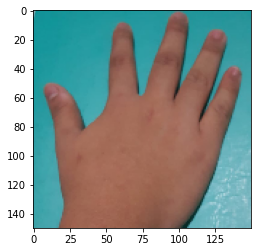

In [121]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  print(fn)
  if hasil==0:
    print("Paper")
  elif hasil==1:
    print("Rock")
  else:
    print("Scissors")